In [4]:
from time import perf_counter
import numpy as np

def setup():
    global photo
    
#     # Simple approach, but way too slow
#     # Result: Took 4.397 seconds
#     photo = load_image("../Lenna_(test_image).png")
#     photo.load_pixels()
#     time_start = perf_counter()
#     for i, v in enumerate(photo.pixels):
#         val = int(red(v) * 0.2126 + green(v) * 0.7152 + blue(v) * 0.0722)
#         photo.pixels[i] = color(val)        
#     time_end = perf_counter()
#     print(f'Took {time_end - time_start:.3f} seconds')

#     # Going back and forth from python to java, using color(), red(), green() and blue()
#     # is way too slow, so I extract the colors manualy by bit shiffting
#     # Colors are stored in an int32 with the order: AARRGGBB 
#     # Result: Took 1.779 seconds
#     photo = load_image("../Lenna_(test_image).png")
#     photo.load_pixels()   
#     time_start = perf_counter()
#     for i, v in enumerate(photo.pixels):
#         ext_b = v & 0xFF
#         ext_g = v >> 8 & 0xFF
#         ext_r = v >> 16 & 0xFF
#         val = int(ext_r * 0.2126 + ext_g * 0.7152 + ext_b * 0.0722)
#         photo.pixels[i] = (0xFF000000 | val << 16 | val << 8 | val)        
#     time_end = perf_counter()
#     print(f'Took {time_end - time_start:.3f} seconds') 

    
#     # Numpy naive approach
#     # Result: Took 1.914 seconds
#     photo = load_image("../Lenna_(test_image).png")
#     photo.load_np_pixels()
#     time_start = perf_counter()    
#     for y in range(photo.np_pixels.shape[0]):
#         for x in range(photo.np_pixels.shape[1]):
#             val = int(photo.np_pixels[y][x][1] * 0.2126 + photo.np_pixels[y][x][2] * 0.7152 + photo.np_pixels[y][x][3] * 0.0722)
#             photo.np_pixels[y][x] = [0xFF, val, val, val]
#     time_end = perf_counter()
#     print(f'Took {time_end - time_start:.3f} seconds')
    
#     # Numpy naive approach + dot product
#     # Result: Took 1.004 seconds
#     photo = load_image("../Lenna_(test_image).png")
#     photo.load_np_pixels()
#     time_start = perf_counter()
#     f = lambda argb : np.dot(argb[1:] , [0.2126 , 0.7152, 0.0722])
#     for y in range(photo.np_pixels.shape[0]):
#         for x in range(photo.np_pixels.shape[1]):
#             val = int(f(photo.np_pixels[y][x]))
#             photo.np_pixels[y][x] = [0xFF, val, val, val]
#     time_end = perf_counter()
#     print(f'Took {time_end - time_start:.3f} seconds')
    
#     # Applying a function directly on the array, same speed but more elegant
#     # Result: Took 0.977 seconds
#     photo = load_image("../Lenna_(test_image).png")
#     photo.load_np_pixels()
#     time_start = perf_counter()
        
#     def g_func(a):
#         val = int(np.dot(a[1:] , [0.2126 , 0.7152, 0.0722]))
#         return [0xFF, val, val, val]
    
#     result_array = np.apply_along_axis(g_func, 2, photo.np_pixels)
#     create_image_from_numpy(result_array, 'ARGB', dst = photo)
#     time_end = perf_counter()
#     print(f'Took {time_end - time_start:.3f} seconds')

    # Vectorized version ... I guess ... don't ask me too much question, it starts to be sorcery at this point
    # performance increase since naive version:  4.397 seconds / 0.029 seconds
    # Result: Took 0.029 seconds
    photo = load_image("../Lenna_(test_image).png")
    photo.load_np_pixels()
    time_start = perf_counter()
        
    def g_func(a):
        val = np.dot(a[..., 1:] , [0.2126 , 0.7152, 0.0722]).astype(int)
        return  val

    result_array = g_func(photo.np_pixels)
    ff_array = np.full((photo.width, photo.height), 0xFF)
    result_array = np.stack((ff_array, result_array, result_array, result_array), axis=2)
    
    create_image_from_numpy(result_array, 'ARGB', dst = photo)
    time_end = perf_counter()
    print(f'Took {time_end - time_start:.3f} seconds')

#     photo.update_pixels()
#     photo.update_np_pixels()
    
    window_resize(photo.width, photo.height)
    
    no_loop()
    
def draw():    
    image(photo, 0, 0)
    save_frame("./grayscale_0001.png", use_thread=True) 
    
run_sketch()

Took 0.029 seconds


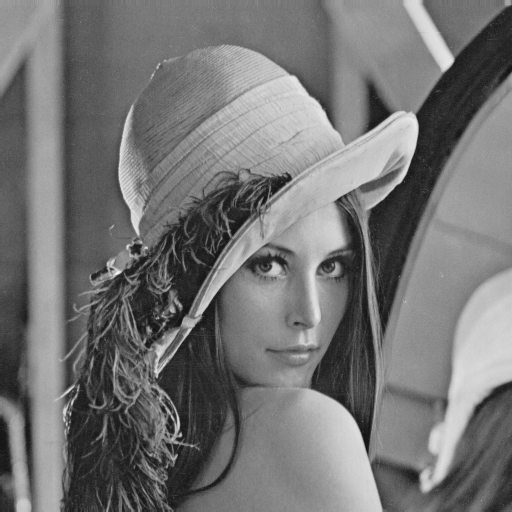